## Visualizing Covid19 data for Iceland in 2020

## data source

The data is from [European Centre for Disease Prevention and Control](https://ia241-bullard.notebook.us-east-1.sagemaker.aws/notebooks/IA241-Gituhub/COVID%20FINAL.ipynb#:~:text=European%20Centre%20for%20Disease%20Prevention%20and%20Control)



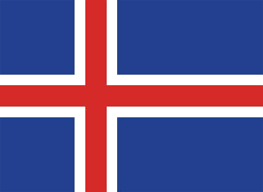

In [ ]:
%matplotlib inline
import pandas

In [7]:
df = pandas.read_excel('s3://ia241-bullard/covid_data.xls')
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-09-12 00:00:00,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-08-12 00:00:00,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-07-12 00:00:00,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-06-12 00:00:00,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-05-12 00:00:00,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## Data On Iceland

In [65]:
iceland_data = df.loc[ df['countriesAndTerritories']=='Iceland'  ]
iceland_data[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
26395,14/12/2020,14,12,2020,5,0,Iceland,IS,ISL,356991.0,Europe,49.300963
26396,13/12/2020,13,12,2020,13,0,Iceland,IS,ISL,356991.0,Europe,50.701558
26397,2020-12-12 00:00:00,12,12,2020,15,0,Iceland,IS,ISL,356991.0,Europe,54.062988
26398,2020-11-12 00:00:00,11,12,2020,8,0,Iceland,IS,ISL,356991.0,Europe,56.303940
26399,2020-10-12 00:00:00,10,12,2020,10,0,Iceland,IS,ISL,356991.0,Europe,57.144298
26400,2020-09-12 00:00:00,9,12,2020,10,1,Iceland,IS,ISL,356991.0,Europe,58.264774
26401,2020-08-12 00:00:00,8,12,2020,14,0,Iceland,IS,ISL,356991.0,Europe,57.984655
26402,2020-07-12 00:00:00,7,12,2020,6,0,Iceland,IS,ISL,356991.0,Europe,57.424417
26403,2020-06-12 00:00:00,6,12,2020,14,0,Iceland,IS,ISL,356991.0,Europe,57.984655
26404,2020-05-12 00:00:00,5,12,2020,14,0,Iceland,IS,ISL,356991.0,Europe,59.105131


## Case count across months

In [66]:
cases_per_day = iceland_data.groupby('month').sum()['cases']
print(cases_per_day)

month
1        0
2        1
3     1085
4      711
5        9
6       16
7       50
8      233
9      590
10    2102
11     584
12     176
Name: cases, dtype: int64


<AxesSubplot:xlabel='month'>

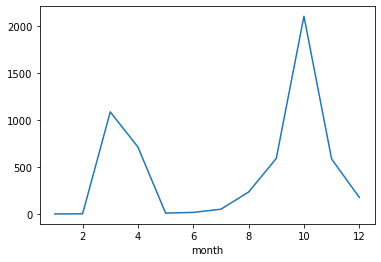

In [41]:
cases_per_day.plot()

In [104]:
cases=iceland_data.sum()['cases']
print('Iceland had {} cases in 2020.'.format(cases))

Iceland had 5557 cases in 2020.


Iceland had their first case in February. Two distinct rising trends are shown. First rise was in March peaking at 1085 cases. Second rise began in September with 590 and peaked in October with 2102. Over the course of 2020 Iceland had 5557 total cases.

## Data on Covid deaths

In [103]:
iceland_death=iceland_data.sum()['deaths']
print('Iceland had {} deaths in 2020.'.format(iceland_death))

Iceland had 28 deaths in 2020.


<AxesSubplot:xlabel='cases', ylabel='deaths'>

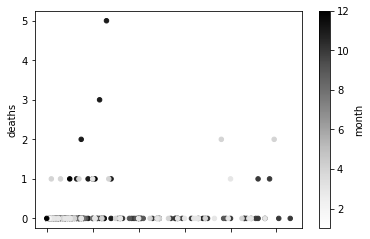

In [47]:
iceland_data.plot.scatter(x='cases',y='deaths',c='month')

A seemingly lackluster scatter plot due to Iceland's relative low case to death ratio. With only 28 deaths across 2020 Iceland had a mortality rate of 0.005.

## Continent Data

In [86]:
europe_data= df.loc[ df['continentExp']=='Europe'  ]
e_cases=europe_data.sum()['cases']
e_deaths=europe_data.sum()['deaths']
print('In 2020 Europe had {} cases and {} deaths.'.format(e_cases,e_deaths))

In 2020 Europe had 21400012 cases and 479789 deaths.


<AxesSubplot:xlabel='continentExp'>

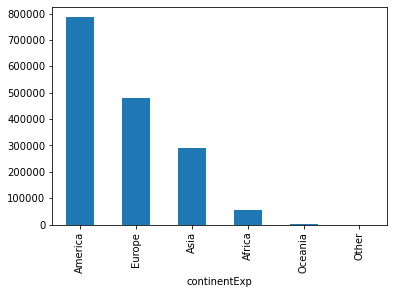

In [90]:
sum_deaths_per_continent=df.groupby('continentExp').sum()['deaths']
sum_deaths_per_continent.nlargest(10).plot.bar()

This bar graph brings together the continents with the most deaths and shows each continents total death count. This is done to show Iceland's low contribution of cases to the total of Europe. Finally Europe is contrasted to America's massive death count.

## Explanation of equations

My equations revolved around pulling data specifc for Iceland, from there sorting out cases/death per month. I made a line, bar and scatter plot to display the respective data and trends relative to month. Because Iceland had very low cases throughout 2020 my equations focused on displaying rather than maninpulating.

## Limitations

The most evident limitaion of this project is the use of an outdated data set. Iceland is a perfect example for such limitation. In 2020 Iceland had a very low case rate however through 2021-2022 this rate has gone up substantially since this data was posted. Fixing this limitation could be done by using a more current data set or even linking this webpage to a constantly updated case count specifically on Iceland.

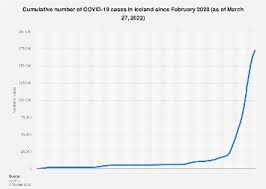

For further proof this graph from [Statista.com](https://www.statista.com/statistics/1106822/cumulative-coronavirus-cases-in-iceland/) shows the true effect of Covid 19 on Iceland. The trend of very low cases from 2020 presisted into December 21' where there was steep rise totally at 172,507 cases as of March 22'.

## Conclusion & Author

While undeniably a well done project that "accurately" displays Iceland's Covid data, this data is still from 2020 and has since become obsolete. Iceland's 2020 data != current numbers. Iceland was not able to maintain their low numbers nor the rise and fall trend seen following the months of March and October where the numbers fell to single digits. Growing cases in Iceland did not change the mortality rate, with only 119 Covid19 deaths Iceland maintained less than %0.0006 mortality rate. Deaths per capita = 33.87.

Lead Analyst - Griffith Bullard
bullargl@dukes.jmu.edu